# Tugas Besar Recommender System
Ridhwan Nashir 2301221026 <br>
Ananda Fitri<br>
Angel Metanosa

## Data Exploration

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
dfMovies = pd.read_csv('https://raw.githubusercontent.com/ridhwanashir/sysRec_finalProject/main/ml-latest-small/movies.csv')
dfRatings = pd.read_csv('https://raw.githubusercontent.com/ridhwanashir/sysRec_finalProject/main/ml-latest-small/ratings.csv')

dfLinks = pd.read_csv('https://raw.githubusercontent.com/ridhwanashir/sysRec_finalProject/main/ml-latest-small/links.csv')
dfTags = pd.read_csv('https://raw.githubusercontent.com/ridhwanashir/sysRec_finalProject/main/ml-latest-small/tags.csv')

In [95]:
dfMovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [96]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [97]:
dfRatings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [98]:
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [99]:
# jumlah user
len(dfRatings['userId'].unique())

610

# Collaborative Filtering

## Step by step Collaborative Filtering

In [100]:
dfCollaborative = dfMovies.merge(dfRatings, how="left", on="movieId")
dfCollaborative.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [101]:
dfCollaborative.shape

(100854, 6)

In [102]:
dfCollaborative['title'].nunique()

9737

In [103]:
dfCollaborative["title"].value_counts()

Forrest Gump (1994)                      329
Shawshank Redemption, The (1994)         317
Pulp Fiction (1994)                      307
Silence of the Lambs, The (1991)         279
Matrix, The (1999)                       278
                                        ... 
Pride (2007)                               1
We're Back! A Dinosaur's Story (1993)      1
Black Book (Zwartboek) (2006)              1
Are We Done Yet? (2007)                    1
Andrew Dice Clay: Dice Rules (1991)        1
Name: title, Length: 9737, dtype: int64

In [104]:
reviewCounts = pd.DataFrame(dfCollaborative["title"].value_counts()).reset_index()
reviewCounts = reviewCounts.rename(columns={'title':'count','index':'title'})
reviewCounts

,title,count
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9732,Pride (2007),1
9733,We're Back! A Dinosaur's Story (1993),1
9734,Black Book (Zwartboek) (2006),1
9735,Are We Done Yet? (2007),1


Text(0.5, 1.0, 'Distribusi Jumlah Film yang telah di Review (Log Scale)')

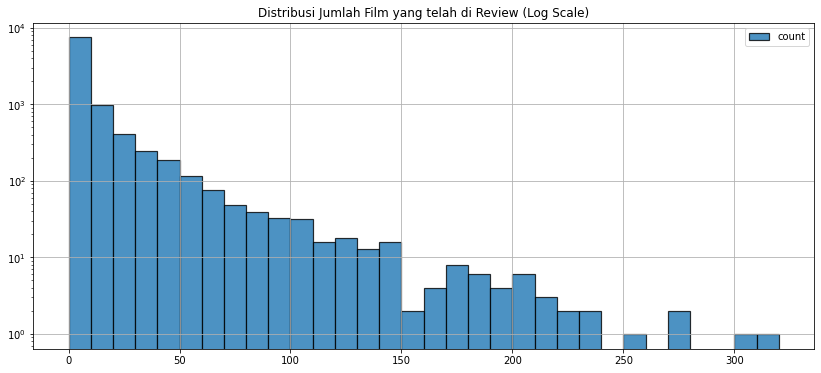

In [105]:
bin_values = np.arange(start=0, stop=330, step=10)
reviewCounts['count'].hist(bins=bin_values, figsize=[14,6], log=True, alpha=.8, legend=True, edgecolor='black', linewidth=1.2)
plt.title('Distribusi Jumlah Film yang telah di Review (Log Scale)')

Berdasarkan hasil distribusi tersebut, maka mayoritas jumlah review film ada di angka 1-10 sehingga film dengan sedikit review tidak bisa dianggap outlier

In [106]:
# lihat pesebaran jumlah review tiap user
userReviewCounts = dfRatings.groupby('userId').agg({'userId':'count'}).rename(columns={'userId':'count'}).reset_index()
print('nilai max: ',max(userReviewCounts['count']))
print('nilai min: ',min(userReviewCounts['count']))

nilai max:  2698
nilai min:  20


Text(0.5, 1.0, 'Distribusi Jumlah Review Film setiap User (Log Scale)')

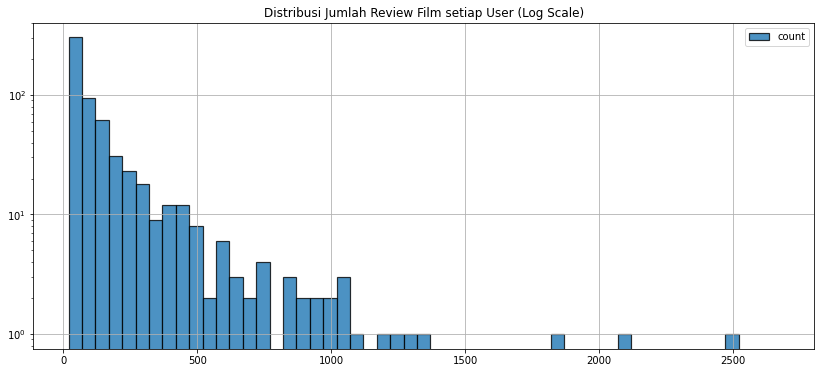

In [107]:
bin_values = np.arange(start=20, stop=2700, step=50)
userReviewCounts['count'].hist(bins=bin_values, figsize=[14,6], log=True, alpha=.8, legend=True, edgecolor='black', linewidth=1.2)
plt.title('Distribusi Jumlah Review Film setiap User (Log Scale)')

Berdasarkan hasil distribusi tersebut, maka mayoritas user melakukan review sebanyak kurang dari 500 film, dengan beberapa user melakukan review hingga 2600 film

In [108]:
# create user movie pivot table
dfUserMoviePivot = dfCollaborative.pivot_table(index=["userId"], columns=["title"], values="rating")
dfUserMoviePivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [109]:
# select random user
random_user = 12
dfRandomUser = dfUserMoviePivot[dfUserMoviePivot.index == random_user]
dfRandomUser

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
12.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Movies watched by given user
moviesWatched = dfRandomUser.columns[dfRandomUser.notna().any()].tolist()
len(moviesWatched)

32

In [111]:
# reduced dataframe for movie watched by given user
dfMoviesWatched = dfUserMoviePivot[moviesWatched]
dfMoviesWatched.shape

(610, 32)

In [112]:
# correlation between each all other users:
dfCorr = dfMoviesWatched.T.corr().unstack().sort_values().drop_duplicates()
dfCorr = pd.DataFrame(dfCorr, columns=["corr"])
dfCorr.index.names = ['user_id_1', 'user_id_2']
dfCorr = dfCorr.reset_index()

# correlation between given user and all other users, filter with 0.2 or more corr value:
dfCorr = dfCorr[(dfCorr["user_id_1"] == random_user) & (dfCorr["corr"] >= 0.2)][["user_id_2", "corr"]].reset_index(drop=True)
dfCorr = dfCorr.sort_values(by='corr', ascending=False)
dfCorr.rename(columns={"user_id_2": "userId"}, inplace=True)
dfCorr

,userId,corr
13,84.0,0.853913
12,495.0,0.826192
11,419.0,0.792406
10,27.0,0.777778
9,113.0,0.742861
8,428.0,0.720277
7,240.0,0.698771
6,103.0,0.594089
5,406.0,0.508773
4,479.0,0.471405


In [113]:
# Calculate the Weighted Average Recommendation Score.

# create a dataframe of user with high correlation and all movie rating/review from that user 
dfMovieRecommendationU = dfCorr.merge(dfRatings[['userId','movieId','rating']], how='inner')

# calculate the score with the most similar by corr * rating:
dfMovieRecommendationU['weighted_rating'] = dfMovieRecommendationU['corr'] * dfMovieRecommendationU['rating']
dfMovieRecommendationU = dfMovieRecommendationU.groupby('movieId').agg({'weighted_rating': 'mean'})
# ascending sort
dfMovieRecommendationU = dfMovieRecommendationU.reset_index().sort_values(by='weighted_rating', ascending=False)
dfMovieRecommendationU = dfMovieRecommendationU.merge(dfMovies[['movieId','title']])
dfMovieRecommendationU

,movieId,weighted_rating,title
0,926,4.269563,All About Eve (1950)
1,17,4.269563,Sense and Sensibility (1995)
2,446,4.269563,Farewell My Concubine (Ba wang bie ji) (1993)
3,1292,4.269563,Being There (1979)
4,52,4.269563,Mighty Aphrodite (1995)
...,...,...,...
1868,159858,0.138675,The Conjuring 2 (2016)
1869,4054,0.138675,Save the Last Dance (2001)
1870,93270,0.138675,Project X (2012)
1871,92420,0.138675,Chronicle (2012)


In [114]:
# example of 5 movie recommendation user-based CF
dfMovieRecommendationU[:5]

,movieId,weighted_rating,title
0,926,4.269563,All About Eve (1950)
1,17,4.269563,Sense and Sensibility (1995)
2,446,4.269563,Farewell My Concubine (Ba wang bie ji) (1993)
3,1292,4.269563,Being There (1979)
4,52,4.269563,Mighty Aphrodite (1995)


In [115]:
# example of 5 movie recommendation item-based CF

# select last highest rated movie by given user
movie_id = dfRatings[(dfRatings["userId"] == random_user) & (dfRatings["rating"] == 5.0)].sort_values(by="timestamp", ascending=False)["movieId"][0:1].values[0]
movie_id

movie_name = dfMovies[dfMovies['movieId'] == movie_id]['title'].values[0]
movie_name = dfUserMoviePivot[movie_name]
dfMovieRecommendationI = dfUserMoviePivot.corrwith(movie_name).sort_values(ascending=False)
dfMovieRecommendationI[1:6].index.to_list()

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


['Howling, The (1980)',
 "Hachiko: A Dog's Story (a.k.a. Hachi: A Dog's Tale) (2009)",
 'Thesis (Tesis) (1996)',
 'Hand That Rocks the Cradle, The (1992)',
 'The Odyssey (1997)']

## CF with Function

In [157]:
def CollaborativeFilteringMovieLens(userid, totalRecommendation):
  n = totalRecommendation
  dfCollaborative = dfMovies.merge(dfRatings, how="left", on="movieId")
  # create user movie pivot table
  dfUserMoviePivot = dfCollaborative.pivot_table(index=["userId"], columns=["title"], values="rating")
  # select pivot for given user
  dfUser = dfUserMoviePivot[dfUserMoviePivot.index == userid]
  # Movies watched by given user
  moviesWatched = dfUser.columns[dfUser.notna().any()].tolist()
  # reduced dataframe for movie watched by given user
  dfMoviesWatched = dfUserMoviePivot[moviesWatched]
  # correlation between each all other users:
  dfCorr = dfMoviesWatched.T.corr().unstack().sort_values().drop_duplicates()
  dfCorr = pd.DataFrame(dfCorr, columns=["corr"])
  dfCorr.index.names = ['user_id_1', 'user_id_2']
  dfCorr = dfCorr.reset_index()
  # correlation between given user and all other users, filter with 0.2 or more corr value:
  dfCorr = dfCorr[(dfCorr["user_id_1"] == userid) & (dfCorr["corr"] >= 0.2)][["user_id_2", "corr"]].reset_index(drop=True)
  dfCorr = dfCorr.sort_values(by='corr', ascending=False)
  dfCorr.rename(columns={"user_id_2": "userId"}, inplace=True)

# User Based
  # Calculate the Weighted Average Recommendation Score.
  # create a dataframe of user with high correlation and all movie rating/review from that user 
  dfMovieRecommendationU = dfCorr.merge(dfRatings[['userId','movieId','rating']], how='inner')
  # calculate the score with the most similar by corr * rating:
  dfMovieRecommendationU['weighted_rating'] = dfMovieRecommendationU['corr'] * dfMovieRecommendationU['rating']
  dfMovieRecommendationU = dfMovieRecommendationU.groupby('movieId').agg({'weighted_rating': 'mean'})
  # ascending sort
  dfMovieRecommendationU = dfMovieRecommendationU.reset_index().sort_values(by='weighted_rating', ascending=False)
  dfMovieRecommendationU = dfMovieRecommendationU.merge(dfMovies[['movieId','title']])

# Item Based
  # select last highest rated movie by given user
  movie_id = dfRatings[(dfRatings["userId"] == userid) & (dfRatings["rating"] == 5.0)].sort_values(by="timestamp", ascending=False)["movieId"][0:1].values[0]
  movie_name = dfMovies[dfMovies['movieId'] == movie_id]['title'].values[0]
  movie_name = dfUserMoviePivot[movie_name]
  dfMovieRecommendationI = dfUserMoviePivot.corrwith(movie_name).sort_values(ascending=False)

  # movie recommendation user-based CF
  userBased = dfMovieRecommendationU[:n]['title'].to_list()
  # movie recommendation item-based CF
  itemBased = dfMovieRecommendationI[1:n+1].index.to_list()

  arrResult = []
  arrUser = []
  arrItem = []
  for item in userBased:
    arrUser.append(item)
  for item in itemBased:
    arrItem.append(item)
  arrResult.append(arrUser)
  arrResult.append(arrItem)

  return pd.DataFrame(arrResult).T.rename(columns={0:'User Based Recommendation',1:'Item Based Recommendation'})

In [161]:
# recommendation for userid 120, top 10
CollaborativeFilteringMovieLens(120, 10)

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,User Based Recommendation,Item Based Recommendation
0,Run Silent Run Deep (1958),"Circus, The (1928)"
1,"Sandpiper, The (1965)",V/H/S (2012)
2,McCabe & Mrs. Miller (1971),Hellraiser: Bloodline (1996)
3,"Cement Garden, The (1993)",Song of the South (1946)
4,Hype! (1996),Police Story (Ging chaat goo si) (1985)
5,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Beyond the Poseidon Adventure (1979)
6,Breaking the Waves (1996),Death Wish 3 (1985)
7,Vampire in Venice (Nosferatu a Venezia) (Nosfe...,After the Thin Man (1936)
8,All That Heaven Allows (1955),And Then There Were None (1945)
9,Black Tar Heroin: The Dark End of the Street (...,"Perfect Candidate, A (1996)"
